# Example of using the Borehole3D class

## Imports

In [1]:
from striplog import Component, Decor, Legend, Lexicon, Striplog
from core.omf import Borehole3D, striplog_legend_to_omf_legend 
from utils.lexicon.lexicon_memoris import lexicon_memoris, lithology_memoris, pollutant_memoris
from utils.io import boreholes_from_files, gdf_viewer
from core.core import Project
from core.orm import BoreholeOrm, PositionOrm, Base 
import random
from os import remove
import pandas as pd
import numpy as np
from sqlalchemy import create_engine
from sqlalchemy.orm import sessionmaker
from definitions import ROOT_DIR

/home/yanathan/.local/share/virtualenvs/GSDMA-DRfwm83x/lib/python3.8/site-packages/striplog/legend.py:687: UserWarning: This legend contains duplicate components.
  warnings.warn(w)
/home/yanathan/.local/share/virtualenvs/GSDMA-DRfwm83x/lib/python3.8/site-packages/striplog/legend.py:687: UserWarning: This legend contains duplicate components.
  warnings.warn(w)


## Reading of CSV files in a dir

In [2]:
#df = pd.read_csv('test_data_boreholes.csv', sep=',') # use english lexicon
df = pd.read_csv('test_litho_fr.csv', sep=',') # use french lexicon

## Data Checking

In [3]:
#pol = ['As', 'Ni', 'Cl', 'Hg', 'Pb', 'Zn']
pol = ['VR','VS','VI']
#df[['Pollutant', 'Concentration']] = ''
df[['Pollutant', 'Concentration']] = ''
df['Pollutant'] = df['Pollutant'].apply(lambda x: random.sample(pol, 1)[0])
df['Concentration'] = df['Concentration'].apply(lambda x: np.random.randint(0,100))
df['Unit'] = 'mg/l'

In [4]:
df['Lithology'] = df['Lithology'].replace({'Grès':'Marne', 'Calcaire':'Dolomie'})

In [5]:
df.loc[35.5, :] = ['BH007',152794.0, 121111.0, 60.0, 0.57, 45, 'Calcaire', 'Bleu', 4, 41, 45, 'Cl', 78, 'mg/l']
df.loc[25.5, :] = ['BH005',152473.0, 121460.0, 72.0, 0.61, 32, 'Schiste', 'gris', 3, 29, 32, 'Cl', 78, 'mg/l']
df.drop(index=4, inplace=True)
df.drop(columns='Colour', inplace=True)
df = df.sort_index().reset_index(drop=True)

In [6]:
gdf_viewer(df)

Rows : 996, columns : 13


interactive(children=(IntSlider(value=10, description='rows', max=996, min=10, readout=False), IntSlider(value…

## Create Boreholes from dataframes or files

In [7]:
bhs_df=[df[0:50]] # list of dataframes

In [8]:
boreholes, components, link_intv_comp = boreholes_from_files(bhs_df, verbose=False,
                                                litho_field=['Lithology', 'Pollutant'], 
                                                color_field='Colour', lexicon=lexicon_memoris, 
                                                diam_field='Diameter', thick_field='Thickness')

/home/yanathan/Projects/GSDMA/utils/io.py:469: SAWarning: relationship 'ComponentOrm.intervals' will copy column Components.id to column Linkintervalcomponent.comp_id, which conflicts with relationship(s): 'IntervalOrm.components' (copies Components.id to Linkintervalcomponent.comp_id). If this is not the intention, consider if these relationships should be linked with back_populates, or if viewonly=True should be applied to one or more if they are read-only. For the less common case that foreign key constraints are partially overlapping, the orm.foreign() annotation can be used to isolate the columns that should be written towards.   The 'overlaps' parameter may be used to remove this warning.
  boreholes.append(BoreholeOrm(id=bh_name))
/home/yanathan/Projects/GSDMA/utils/io.py:469: SAWarning: relationship 'ComponentOrm.intervals' will copy column Intervals.id to column Linkintervalcomponent.int_id, which conflicts with relationship(s): 'IntervalOrm.components' (copies Intervals.id to


Dataframe 0 processing...
|__ID:'BH001'
{'lithology': 'sable', 'pollutant': 'vs'}
{'lithology': 'argile', 'pollutant': 'vr'}
{'lithology': 'marne', 'pollutant': 'vs'}
{'lithology': 'charbon', 'pollutant': 'vi'}
Summary : [Striplog(4 Intervals, start=0.0, stop=28.0)]
|__ID:'BH002'
{'lithology': 'sable', 'pollutant': 'vi'}
{'lithology': 'argile', 'pollutant': 'vr'}
{'lithology': 'marne', 'pollutant': 'vi'}
{'lithology': 'charbon', 'pollutant': 'vr'}
{'lithology': 'dolomie', 'pollutant': 'vi'}
Summary : [Striplog(5 Intervals, start=0.0, stop=37.0)]
|__ID:'BH003'
{'lithology': 'sable', 'pollutant': 'vi'}
{'lithology': 'argile', 'pollutant': 'vs'}
{'lithology': 'marne', 'pollutant': 'vs'}
{'lithology': 'charbon', 'pollutant': 'vr'}
{'lithology': 'dolomie', 'pollutant': 'vs'}
Summary : [Striplog(5 Intervals, start=0.0, stop=18.0)]
|__ID:'BH004'
{'lithology': 'sable', 'pollutant': 'vr'}
{'lithology': 'argile', 'pollutant': 'vr'}
{'lithology': 'marne', 'pollutant': 'vs'}
{'lithology': 'charbo

In [9]:
boreholes

[<core.orm.BoreholeOrm>(Name=BH001, Length=28.0, Diameter=0.43, Intervals=4),
 <core.orm.BoreholeOrm>(Name=BH002, Length=37.0, Diameter=0.6, Intervals=5),
 <core.orm.BoreholeOrm>(Name=BH003, Length=18.0, Diameter=0.41, Intervals=5),
 <core.orm.BoreholeOrm>(Name=BH004, Length=26.0, Diameter=0.61, Intervals=5),
 <core.orm.BoreholeOrm>(Name=BH005, Length=32.0, Diameter=0.61, Intervals=6),
 <core.orm.BoreholeOrm>(Name=BH006, Length=26.0, Diameter=0.31, Intervals=5),
 <core.orm.BoreholeOrm>(Name=BH007, Length=45.0, Diameter=0.57, Intervals=6),
 <core.orm.BoreholeOrm>(Name=BH008, Length=35.0, Diameter=0.39, Intervals=5),
 <core.orm.BoreholeOrm>(Name=BH009, Length=40.0, Diameter=0.5, Intervals=5),
 <core.orm.BoreholeOrm>(Name=BH10, Length=14.0, Diameter=0.31, Intervals=4)]

In [10]:
components

{0: Component({'lithology': 'marne', 'pollutant': 'vs'}),
 1: Component({'lithology': 'charbon', 'pollutant': 'vi'}),
 2: Component({'lithology': 'argile', 'pollutant': 'vr'}),
 3: Component({'lithology': 'sable', 'pollutant': 'vs'}),
 4: Component({'lithology': 'dolomie', 'pollutant': 'vi'}),
 5: Component({'lithology': 'marne', 'pollutant': 'vi'}),
 6: Component({'lithology': 'sable', 'pollutant': 'vi'}),
 7: Component({'lithology': 'charbon', 'pollutant': 'vr'}),
 8: Component({'lithology': 'dolomie', 'pollutant': 'vs'}),
 9: Component({'lithology': 'argile', 'pollutant': 'vs'}),
 10: Component({'lithology': 'dolomie', 'pollutant': 'vr'}),
 11: Component({'lithology': 'sable', 'pollutant': 'vr'}),
 12: Component({'lithology': 'charbon', 'pollutant': 'vs'}),
 13: Component({'lithology': 'marne', 'pollutant': 'vr'}),
 14: Component({'lithology': 'argile', 'pollutant': 'vi'}),
 15: Component({'lithology': 'schiste'}),
 16: Component({'lithology': 'calcaire'})}

In [11]:
len(boreholes), len(components)

(10, 17)

## Create a project and save data in a database

In [12]:
remove('tmp_files/tfe_orm_db.db')

In [13]:
engine = create_engine('sqlite:///tmp_files/tfe_orm_db.db', echo=True)

In [14]:
Base.metadata.create_all(engine)

2021-07-04 20:17:07,286 INFO sqlalchemy.engine.Engine BEGIN (implicit)
2021-07-04 20:17:07,287 INFO sqlalchemy.engine.Engine PRAGMA main.table_info("Boreholes")
2021-07-04 20:17:07,288 INFO sqlalchemy.engine.Engine [raw sql] ()
2021-07-04 20:17:07,290 INFO sqlalchemy.engine.Engine PRAGMA temp.table_info("Boreholes")
2021-07-04 20:17:07,290 INFO sqlalchemy.engine.Engine [raw sql] ()
2021-07-04 20:17:07,292 INFO sqlalchemy.engine.Engine PRAGMA main.table_info("Positions")
2021-07-04 20:17:07,292 INFO sqlalchemy.engine.Engine [raw sql] ()
2021-07-04 20:17:07,294 INFO sqlalchemy.engine.Engine PRAGMA temp.table_info("Positions")
2021-07-04 20:17:07,294 INFO sqlalchemy.engine.Engine [raw sql] ()
2021-07-04 20:17:07,296 INFO sqlalchemy.engine.Engine PRAGMA main.table_info("IntervalData")
2021-07-04 20:17:07,296 INFO sqlalchemy.engine.Engine [raw sql] ()
2021-07-04 20:17:07,298 INFO sqlalchemy.engine.Engine PRAGMA temp.table_info("IntervalData")
2021-07-04 20:17:07,298 INFO sqlalchemy.engine.E

In [15]:
Session = sessionmaker(bind=engine)
session = Session()

## Define project legend(s) and default attribute for representation

In [16]:
p = Project(session, lexicon=lexicon_memoris, repr_attribute='lithology',
            legend_dict={'lithology':{'legend':lithology_memoris}, 'pollutant':{'legend':pollutant_memoris}},)

2021-07-04 20:17:07,355 INFO sqlalchemy.engine.Engine BEGIN (implicit)
2021-07-04 20:17:07,358 INFO sqlalchemy.engine.Engine SELECT "Boreholes".id AS "Boreholes_id", "Boreholes".length AS "Boreholes_length", "Boreholes".diameter AS "Boreholes_diameter" 
FROM "Boreholes"
2021-07-04 20:17:07,359 INFO sqlalchemy.engine.Engine [generated in 0.00097s] ()


In [17]:
p.add_components(components)

2021-07-04 20:17:07,368 INFO sqlalchemy.engine.Engine INSERT INTO "Components" (id, description) VALUES (?, ?)
2021-07-04 20:17:07,369 INFO sqlalchemy.engine.Engine [generated in 0.00135s] ((0, 'Marne, vs'), (1, 'Charbon, vi'), (2, 'Argile, vr'), (3, 'Sable, vs'), (4, 'Dolomie, vi'), (5, 'Marne, vi'), (6, 'Sable, vi'), (7, 'Charbon, vr')  ... displaying 10 of 17 total bound parameter sets ...  (15, 'Schiste'), (16, 'Calcaire'))
2021-07-04 20:17:07,372 INFO sqlalchemy.engine.Engine COMMIT
2021-07-04 20:17:07,377 INFO sqlalchemy.engine.Engine BEGIN (implicit)
2021-07-04 20:17:07,378 INFO sqlalchemy.engine.Engine SELECT "Boreholes".id AS "Boreholes_id", "Boreholes".length AS "Boreholes_length", "Boreholes".diameter AS "Boreholes_diameter" 
FROM "Boreholes"
2021-07-04 20:17:07,379 INFO sqlalchemy.engine.Engine [cached since 0.0206s ago] ()


Add boreholes into the project

In [18]:
for bh in boreholes:
    p.add_borehole(bh)

2021-07-04 20:17:07,387 INFO sqlalchemy.engine.Engine INSERT INTO "Boreholes" (id, length, diameter) VALUES (?, ?, ?)
2021-07-04 20:17:07,389 INFO sqlalchemy.engine.Engine [generated in 0.00182s] ('BH001', 28.0, 0.43)
2021-07-04 20:17:07,392 INFO sqlalchemy.engine.Engine INSERT INTO "Positions" (id, upper, middle, lower, x, y) VALUES (?, ?, ?, ?, ?, ?)
2021-07-04 20:17:07,392 INFO sqlalchemy.engine.Engine [generated in 0.00082s] ((0, 101.0, 101.0, 101.0, 152600.0, 121039.0), (1, 97.0, 97.0, 97.0, 152600.0, 121039.0), (2, 97.0, 97.0, 97.0, 152600.0, 121039.0), (3, 93.0, 93.0, 93.0, 152600.0, 121039.0), (4, 93.0, 93.0, 93.0, 152600.0, 121039.0), (5, 81.0, 81.0, 81.0, 152600.0, 121039.0), (6, 81.0, 81.0, 81.0, 152600.0, 121039.0), (7, 73.0, 73.0, 73.0, 152600.0, 121039.0))
2021-07-04 20:17:07,395 INFO sqlalchemy.engine.Engine INSERT INTO "Intervals" (id, borehole, interval_number, description, top_id, base_id, data_id) VALUES (?, ?, ?, ?, ?, ?, ?)
2021-07-04 20:17:07,396 INFO sqlalchemy.e

2021-07-04 20:17:07,476 INFO sqlalchemy.engine.Engine [cached since 0.1177s ago] ()
2021-07-04 20:17:07,478 INFO sqlalchemy.engine.Engine SELECT "Intervals".id AS "Intervals_id", "Intervals".borehole AS "Intervals_borehole", "Intervals".interval_number AS "Intervals_interval_number", "Intervals".description AS "Intervals_description", "Intervals".top_id AS "Intervals_top_id", "Intervals".base_id AS "Intervals_base_id", "Intervals".data_id AS "Intervals_data_id" 
FROM "Intervals" 
WHERE ? = "Intervals".borehole
2021-07-04 20:17:07,479 INFO sqlalchemy.engine.Engine [cached since 0.06908s ago] ('BH002',)
2021-07-04 20:17:07,481 INFO sqlalchemy.engine.Engine SELECT "Positions".id AS "Positions_id", "Positions".upper AS "Positions_upper", "Positions".middle AS "Positions_middle", "Positions".lower AS "Positions_lower", "Positions".x AS "Positions_x", "Positions".y AS "Positions_y" 
FROM "Positions" 
WHERE "Positions".id = ?
2021-07-04 20:17:07,482 INFO sqlalchemy.engine.Engine [cached since

2021-07-04 20:17:07,543 INFO sqlalchemy.engine.Engine [cached since 0.1264s ago] (18,)
2021-07-04 20:17:07,545 INFO sqlalchemy.engine.Engine SELECT "Positions".id AS "Positions_id", "Positions".upper AS "Positions_upper", "Positions".middle AS "Positions_middle", "Positions".lower AS "Positions_lower", "Positions".x AS "Positions_x", "Positions".y AS "Positions_y" 
FROM "Positions" 
WHERE "Positions".id = ?
2021-07-04 20:17:07,546 INFO sqlalchemy.engine.Engine [cached since 0.1244s ago] (19,)
2021-07-04 20:17:07,549 INFO sqlalchemy.engine.Engine SELECT "Positions".id AS "Positions_id", "Positions".upper AS "Positions_upper", "Positions".middle AS "Positions_middle", "Positions".lower AS "Positions_lower", "Positions".x AS "Positions_x", "Positions".y AS "Positions_y" 
FROM "Positions" 
WHERE "Positions".id = ?
2021-07-04 20:17:07,550 INFO sqlalchemy.engine.Engine [cached since 0.1326s ago] (20,)
2021-07-04 20:17:07,551 INFO sqlalchemy.engine.Engine SELECT "Positions".id AS "Positions_i

2021-07-04 20:17:07,614 INFO sqlalchemy.engine.Engine [cached since 0.1971s ago] (30,)
2021-07-04 20:17:07,615 INFO sqlalchemy.engine.Engine SELECT "Positions".id AS "Positions_id", "Positions".upper AS "Positions_upper", "Positions".middle AS "Positions_middle", "Positions".lower AS "Positions_lower", "Positions".x AS "Positions_x", "Positions".y AS "Positions_y" 
FROM "Positions" 
WHERE "Positions".id = ?
2021-07-04 20:17:07,616 INFO sqlalchemy.engine.Engine [cached since 0.1938s ago] (31,)
2021-07-04 20:17:07,617 INFO sqlalchemy.engine.Engine SELECT "Positions".id AS "Positions_id", "Positions".upper AS "Positions_upper", "Positions".middle AS "Positions_middle", "Positions".lower AS "Positions_lower", "Positions".x AS "Positions_x", "Positions".y AS "Positions_y" 
FROM "Positions" 
WHERE "Positions".id = ?
2021-07-04 20:17:07,618 INFO sqlalchemy.engine.Engine [cached since 0.2013s ago] (32,)
2021-07-04 20:17:07,620 INFO sqlalchemy.engine.Engine SELECT "Positions".id AS "Positions_i

2021-07-04 20:17:07,683 INFO sqlalchemy.engine.Engine [cached since 0.2661s ago] (42,)
2021-07-04 20:17:07,685 INFO sqlalchemy.engine.Engine SELECT "Positions".id AS "Positions_id", "Positions".upper AS "Positions_upper", "Positions".middle AS "Positions_middle", "Positions".lower AS "Positions_lower", "Positions".x AS "Positions_x", "Positions".y AS "Positions_y" 
FROM "Positions" 
WHERE "Positions".id = ?
2021-07-04 20:17:07,686 INFO sqlalchemy.engine.Engine [cached since 0.2635s ago] (43,)
2021-07-04 20:17:07,688 INFO sqlalchemy.engine.Engine SELECT "Positions".id AS "Positions_id", "Positions".upper AS "Positions_upper", "Positions".middle AS "Positions_middle", "Positions".lower AS "Positions_lower", "Positions".x AS "Positions_x", "Positions".y AS "Positions_y" 
FROM "Positions" 
WHERE "Positions".id = ?
2021-07-04 20:17:07,688 INFO sqlalchemy.engine.Engine [cached since 0.2714s ago] (44,)
2021-07-04 20:17:07,690 INFO sqlalchemy.engine.Engine SELECT "Positions".id AS "Positions_i

2021-07-04 20:17:07,753 INFO sqlalchemy.engine.Engine [cached since 0.3308s ago] (53,)
2021-07-04 20:17:07,755 INFO sqlalchemy.engine.Engine SELECT "Positions".id AS "Positions_id", "Positions".upper AS "Positions_upper", "Positions".middle AS "Positions_middle", "Positions".lower AS "Positions_lower", "Positions".x AS "Positions_x", "Positions".y AS "Positions_y" 
FROM "Positions" 
WHERE "Positions".id = ?
2021-07-04 20:17:07,757 INFO sqlalchemy.engine.Engine [cached since 0.3403s ago] (54,)
2021-07-04 20:17:07,759 INFO sqlalchemy.engine.Engine SELECT "Positions".id AS "Positions_id", "Positions".upper AS "Positions_upper", "Positions".middle AS "Positions_middle", "Positions".lower AS "Positions_lower", "Positions".x AS "Positions_x", "Positions".y AS "Positions_y" 
FROM "Positions" 
WHERE "Positions".id = ?
2021-07-04 20:17:07,760 INFO sqlalchemy.engine.Engine [cached since 0.3376s ago] (55,)
2021-07-04 20:17:07,762 INFO sqlalchemy.engine.Engine SELECT "Positions".id AS "Positions_i

2021-07-04 20:17:07,823 INFO sqlalchemy.engine.Engine SELECT "Positions".id AS "Positions_id", "Positions".upper AS "Positions_upper", "Positions".middle AS "Positions_middle", "Positions".lower AS "Positions_lower", "Positions".x AS "Positions_x", "Positions".y AS "Positions_y" 
FROM "Positions" 
WHERE "Positions".id = ?
2021-07-04 20:17:07,824 INFO sqlalchemy.engine.Engine [cached since 0.4023s ago] (65,)
2021-07-04 20:17:07,827 INFO sqlalchemy.engine.Engine SELECT "Positions".id AS "Positions_id", "Positions".upper AS "Positions_upper", "Positions".middle AS "Positions_middle", "Positions".lower AS "Positions_lower", "Positions".x AS "Positions_x", "Positions".y AS "Positions_y" 
FROM "Positions" 
WHERE "Positions".id = ?
2021-07-04 20:17:07,828 INFO sqlalchemy.engine.Engine [cached since 0.4115s ago] (66,)
2021-07-04 20:17:07,831 INFO sqlalchemy.engine.Engine SELECT "Positions".id AS "Positions_id", "Positions".upper AS "Positions_upper", "Positions".middle AS "Positions_middle", "

2021-07-04 20:17:07,891 INFO sqlalchemy.engine.Engine [cached since 0.4746s ago] (76,)
2021-07-04 20:17:07,893 INFO sqlalchemy.engine.Engine SELECT "Positions".id AS "Positions_id", "Positions".upper AS "Positions_upper", "Positions".middle AS "Positions_middle", "Positions".lower AS "Positions_lower", "Positions".x AS "Positions_x", "Positions".y AS "Positions_y" 
FROM "Positions" 
WHERE "Positions".id = ?
2021-07-04 20:17:07,894 INFO sqlalchemy.engine.Engine [cached since 0.4721s ago] (77,)
2021-07-04 20:17:07,896 INFO sqlalchemy.engine.Engine SELECT "Positions".id AS "Positions_id", "Positions".upper AS "Positions_upper", "Positions".middle AS "Positions_middle", "Positions".lower AS "Positions_lower", "Positions".x AS "Positions_x", "Positions".y AS "Positions_y" 
FROM "Positions" 
WHERE "Positions".id = ?
2021-07-04 20:17:07,897 INFO sqlalchemy.engine.Engine [cached since 0.4805s ago] (78,)
2021-07-04 20:17:07,899 INFO sqlalchemy.engine.Engine SELECT "Positions".id AS "Positions_i

2021-07-04 20:17:07,960 INFO sqlalchemy.engine.Engine [cached since 0.5428s ago] (88,)
2021-07-04 20:17:07,962 INFO sqlalchemy.engine.Engine SELECT "Positions".id AS "Positions_id", "Positions".upper AS "Positions_upper", "Positions".middle AS "Positions_middle", "Positions".lower AS "Positions_lower", "Positions".x AS "Positions_x", "Positions".y AS "Positions_y" 
FROM "Positions" 
WHERE "Positions".id = ?
2021-07-04 20:17:07,962 INFO sqlalchemy.engine.Engine [cached since 0.5403s ago] (89,)
2021-07-04 20:17:07,965 INFO sqlalchemy.engine.Engine SELECT "Positions".id AS "Positions_id", "Positions".upper AS "Positions_upper", "Positions".middle AS "Positions_middle", "Positions".lower AS "Positions_lower", "Positions".x AS "Positions_x", "Positions".y AS "Positions_y" 
FROM "Positions" 
WHERE "Positions".id = ?
2021-07-04 20:17:07,966 INFO sqlalchemy.engine.Engine [cached since 0.5487s ago] (90,)
2021-07-04 20:17:07,968 INFO sqlalchemy.engine.Engine SELECT "Positions".id AS "Positions_i


 pollutant 
-----------------
 {1: Decor({'_colour': '#00ff00', 'width': 3, 'component': Component({'pollutant': 'vr'}), 'hatch': None}), 2: Decor({'_colour': '#ffa500', 'width': 3, 'component': Component({'pollutant': 'vs'}), 'hatch': None}), 0: Decor({'_colour': '#ff0000', 'width': 3, 'component': Component({'pollutant': 'vi'}), 'hatch': None})}
indices: [0 1 2 3]
Borehole geometry created successfully !


In [19]:
p.add_link_between_components_and_intervals(link_intv_comp)

2021-07-04 20:17:08,051 INFO sqlalchemy.engine.Engine UPDATE "Boreholes" SET length=? WHERE "Boreholes".id = ?
2021-07-04 20:17:08,052 INFO sqlalchemy.engine.Engine [cached since 0.593s ago] (95.0, 'BH10')
2021-07-04 20:17:08,056 INFO sqlalchemy.engine.Engine INSERT INTO "Linkintervalcomponent" (int_id, comp_id, extra_data) VALUES (?, ?, ?)
2021-07-04 20:17:08,057 INFO sqlalchemy.engine.Engine [generated in 0.00104s] ((0, 3, ''), (1, 2, ''), (2, 0, ''), (3, 1, ''), (4, 6, ''), (5, 2, ''), (6, 5, ''), (7, 7, '')  ... displaying 10 of 50 total bound parameter sets ...  (48, 13, ''), (49, 12, ''))
2021-07-04 20:17:08,061 INFO sqlalchemy.engine.Engine COMMIT
2021-07-04 20:17:08,065 INFO sqlalchemy.engine.Engine BEGIN (implicit)
2021-07-04 20:17:08,067 INFO sqlalchemy.engine.Engine SELECT "Boreholes".id AS "Boreholes_id", "Boreholes".length AS "Boreholes_length", "Boreholes".diameter AS "Boreholes_diameter" 
FROM "Boreholes"
2021-07-04 20:17:08,068 INFO sqlalchemy.engine.Engine [cached sinc

In [20]:
p.commit()
print('Boreholes in the project : ', len(p.boreholes))

2021-07-04 20:17:08,074 INFO sqlalchemy.engine.Engine COMMIT
Boreholes in the project :  10


In [21]:
p.boreholes

2021-07-04 20:17:08,084 INFO sqlalchemy.engine.Engine BEGIN (implicit)
2021-07-04 20:17:08,086 INFO sqlalchemy.engine.Engine SELECT "Boreholes".id AS "Boreholes_id", "Boreholes".length AS "Boreholes_length", "Boreholes".diameter AS "Boreholes_diameter" 
FROM "Boreholes" 
WHERE "Boreholes".id = ?
2021-07-04 20:17:08,087 INFO sqlalchemy.engine.Engine [generated in 0.00122s] ('BH001',)
2021-07-04 20:17:08,089 INFO sqlalchemy.engine.Engine SELECT "Intervals".id AS "Intervals_id", "Intervals".borehole AS "Intervals_borehole", "Intervals".interval_number AS "Intervals_interval_number", "Intervals".description AS "Intervals_description", "Intervals".top_id AS "Intervals_top_id", "Intervals".base_id AS "Intervals_base_id", "Intervals".data_id AS "Intervals_data_id" 
FROM "Intervals" 
WHERE ? = "Intervals".borehole
2021-07-04 20:17:08,091 INFO sqlalchemy.engine.Engine [cached since 0.681s ago] ('BH001',)
2021-07-04 20:17:08,093 INFO sqlalchemy.engine.Engine SELECT "Boreholes".id AS "Boreholes_i

2021-07-04 20:17:08,142 INFO sqlalchemy.engine.Engine [cached since 0.7325s ago] ('BH10',)


[<core.orm.BoreholeOrm>(Name=BH001, Length=97.0, Diameter=0.43, Intervals=4),
 <core.orm.BoreholeOrm>(Name=BH002, Length=98.0, Diameter=0.6, Intervals=5),
 <core.orm.BoreholeOrm>(Name=BH003, Length=100.0, Diameter=0.41, Intervals=5),
 <core.orm.BoreholeOrm>(Name=BH004, Length=96.0, Diameter=0.61, Intervals=5),
 <core.orm.BoreholeOrm>(Name=BH005, Length=97.0, Diameter=0.61, Intervals=6),
 <core.orm.BoreholeOrm>(Name=BH006, Length=100.0, Diameter=0.31, Intervals=5),
 <core.orm.BoreholeOrm>(Name=BH007, Length=97.0, Diameter=0.57, Intervals=6),
 <core.orm.BoreholeOrm>(Name=BH008, Length=98.0, Diameter=0.39, Intervals=5),
 <core.orm.BoreholeOrm>(Name=BH009, Length=94.0, Diameter=0.5, Intervals=5),
 <core.orm.BoreholeOrm>(Name=BH10, Length=95.0, Diameter=0.31, Intervals=4)]

In [22]:
p.refresh(verbose=False)

2021-07-04 20:17:08,152 INFO sqlalchemy.engine.Engine SELECT "Boreholes".id AS "Boreholes_id", "Boreholes".length AS "Boreholes_length", "Boreholes".diameter AS "Boreholes_diameter" 
FROM "Boreholes"
2021-07-04 20:17:08,154 INFO sqlalchemy.engine.Engine [cached since 0.7961s ago] ()


In [23]:
session.close()

2021-07-04 20:17:08,161 INFO sqlalchemy.engine.Engine ROLLBACK


# 2D/3D Display

In [24]:
attributes = list(p.legend_dict.keys())
attributes

['lithology', 'pollutant']


 lithology 
-----------------
 {0: Decor({'_colour': '#ffcb23', 'width': 3, 'hatch': "'..'", 'component': Component({'lithology': 'sable'})}), 1: Decor({'_colour': '#d5e6cc', 'width': 3, 'hatch': "'---'", 'component': Component({'lithology': 'argile'})}), 3: Decor({'_colour': '#000000', 'width': 3, 'hatch': None, 'component': Component({'lithology': 'charbon'})}), 2: Decor({'_colour': '#7ba1a8', 'width': 3, 'hatch': None, 'component': Component({'lithology': 'marne'})})}

 lithology 
-----------------
 {0: Decor({'_colour': '#ffcb23', 'width': 3, 'hatch': "'..'", 'component': Component({'lithology': 'sable'})}), 1: Decor({'_colour': '#d5e6cc', 'width': 3, 'hatch': "'---'", 'component': Component({'lithology': 'argile'})}), 4: Decor({'_colour': '#fdaffe', 'width': 3, 'hatch': None, 'component': Component({'lithology': 'dolomie'})}), 3: Decor({'_colour': '#000000', 'width': 3, 'hatch': None, 'component': Component({'lithology': 'charbon'})}), 2: Decor({'_colour': '#7ba1a8', 'width': 3, 

 {0: Decor({'_colour': '#00ff00', 'width': 3, 'component': Component({'pollutant': 'vr'}), 'hatch': None}), 2: Decor({'_colour': '#ffa500', 'width': 3, 'component': Component({'pollutant': 'vs'}), 'hatch': None}), 1: Decor({'_colour': '#ff0000', 'width': 3, 'component': Component({'pollutant': 'vi'}), 'hatch': None})}

 pollutant 
-----------------
 {0: Decor({'_colour': '#00ff00', 'width': 3, 'component': Component({'pollutant': 'vr'}), 'hatch': None}), 1: Decor({'_colour': '#ffa500', 'width': 3, 'component': Component({'pollutant': 'vs'}), 'hatch': None}), 2: Decor({'_colour': '#ff0000', 'width': 3, 'component': Component({'pollutant': 'vi'}), 'hatch': None})}

 pollutant 
-----------------
 {1: Decor({'_colour': '#00ff00', 'width': 3, 'component': Component({'pollutant': 'vr'}), 'hatch': None}), 2: Decor({'_colour': '#ffa500', 'width': 3, 'component': Component({'pollutant': 'vs'}), 'hatch': None}), 0: Decor({'_colour': '#ff0000', 'width': 3, 'component': Component({'pollutant': 'vi

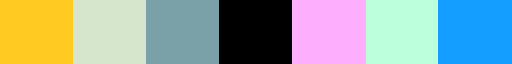

In [25]:
p.update_legend_cmap(update_all_attrib=True)[0][attributes[0]]['cmap']

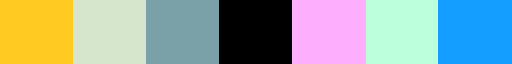

In [26]:
p.legend_dict[attributes[0]]['cmap']

## Display one object (attribute = 'lithology')

In [27]:
bh = 1
p.boreholes_3d[bh]._components

[Component({'lithology': 'sable', 'pollutant': 'vi'}),
 Component({'lithology': 'argile', 'pollutant': 'vr'}),
 Component({'lithology': 'marne', 'pollutant': 'vi'}),
 Component({'lithology': 'charbon', 'pollutant': 'vr'}),
 Component({'lithology': 'dolomie', 'pollutant': 'vi'})]

/home/yanathan/.local/share/virtualenvs/GSDMA-DRfwm83x/lib/python3.8/site-packages/striplog/striplog.py:1505: MatplotlibDeprecationWarning: hatch must consist of a string of "*+-./OX\ox|" or None, but found the following invalid values "'". Passing invalid values is deprecated since 3.4 and will become an error two minor releases later.
  rect = mpl.patches.Rectangle(origin,
/home/yanathan/.local/share/virtualenvs/GSDMA-DRfwm83x/lib/python3.8/site-packages/striplog/legend.py:311: MatplotlibDeprecationWarning: hatch must consist of a string of "*+-./OX\ox|" or None, but found the following invalid values "'". Passing invalid values is deprecated since 3.4 and will become an error two minor releases later.
  rect1 = patches.Rectangle((0, 0),


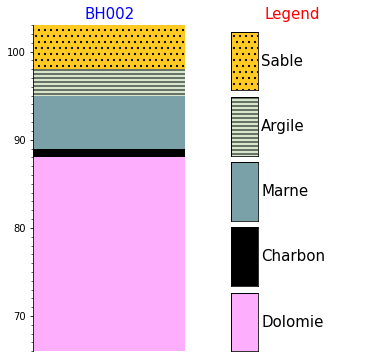

In [28]:
p.boreholes_3d[bh].log_plot()

In [29]:
sargs = dict(title='test', title_font_size=30, label_font_size=12, n_labels=0,
             fmt="%.2f", font_family="arial", color='k',interactive=True, 
             vertical=True, italic=True, shadow=False,)

In [30]:
bh=1
p.boreholes_3d[bh].plot3d(show_legend=False, scalar_bar_args=sargs)

ViewInteractiveWidget(height=768, layout=Layout(height='auto', width='100%'), width=1024)

## Plot with another attribute

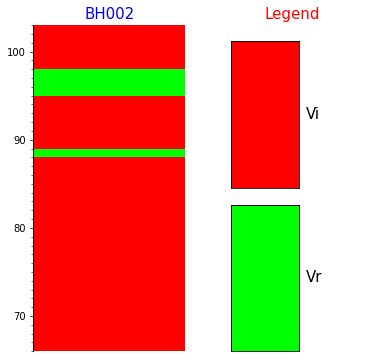

In [31]:
p.boreholes_3d[bh].log_plot(repr_attribute='pollutant')#, repr_legend=pollutant_memoris)

In [32]:
p.boreholes_3d[bh].plot3d(repr_attribute='pollutant')#, repr_legend=pollutant_memoris, show_legend=True)

ValueError: Data field (None) not usable

### Display project boreholes

In [ ]:
p.plot3d(repr_attribute='pollutant', labels_size=15, bg_color=["royalblue", "aliceblue"], window_size=(1300, 1000))

### Boreholes in 3D using X3D for interaction within the notebook